## Goal:
To predict the concrete strength using the data available in file "concrete.csv". Apply feature engineering and model tuning to obtain a score above 85%.

## EDA
Task 1 :  Univariate analysis –data types and description of the independent attributes which should include (name, range of values observed, central values (mean and median), standard deviation and quartiles, analysis of the body of distributions/tails, missing values, outliers, duplicates

In [1]:
# Importing Libraries and modules

import pandas as pd
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor)
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt


import numpy as np

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
con_df = pd.read_csv("concrete.csv")
con_df

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06


In [3]:
print('*******************Number of nulls*********************')
print(con_df.isnull().sum())
print('*******************Bank Shape***********************')
print(con_df.shape)
print('*******************Bank Info************************')
print(con_df.info())
print('*******************************************************')

*******************Number of nulls*********************
cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64
*******************Bank Shape***********************
(1030, 9)
*******************Bank Info************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement          1030 non-null float64
slag            1030 non-null float64
ash             1030 non-null float64
water           1030 non-null float64
superplastic    1030 non-null float64
coarseagg       1030 non-null float64
fineagg         1030 non-null float64
age             1030 non-null int64
strength        1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None
*******************************************************


Observation:
    1. Dataset has 1005 rows and 9 columns
    2. There are no Nulls and all columns are continous variables with datatype float and int

In [4]:
# Finding Duplicate Rows
dup_df=con_df[con_df.duplicated(keep='first')]
print("Duplicate size--",dup_df.shape)
dup_df

Duplicate size-- (25, 9)


,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
278,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
298,425.0,106.3,0.0,153.5,16.5,852.1,887.1,3,33.40
400,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
420,362.6,189.0,0.0,164.9,11.6,944.7,755.8,3,35.30
463,362.6,189.0,0.0,164.9,11.6,944.7,755.8,56,77.30
468,252.0,0.0,0.0,185.0,0.0,1111.0,784.0,28,19.69
482,425.0,106.3,0.0,153.5,16.5,852.1,887.1,91,65.20
493,362.6,189.0,0.0,164.9,11.6,944.7,755.8,91,79.30
517,425.0,106.3,0.0,153.5,16.5,852.1,887.1,56,64.30
525,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28,71.30


In [5]:
# Dropping Duplicates from the dataset
con_df.drop_duplicates(keep='first',inplace=True)
con_df.shape

(1005, 9)

In [6]:
# No More Duplicate Rows left in the dataset
con_df[con_df.duplicated(keep=False)]

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength


In [7]:
# No of uniques per column
con_df.nunique()

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

Observation:
    All features as well as target variable are continous numeric variables

In [8]:
# Getting 5 point summary
con_df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1005.0,278.631343,104.344261,102.00,190.70,265.0,349.00,540.0
slag,1005.0,72.043483,86.170807,0.00,0.00,20.0,142.50,359.4
ash,1005.0,55.536318,64.207969,0.00,0.00,0.0,118.30,200.1
water,1005.0,182.075323,21.339334,121.80,166.60,185.7,192.90,247.0
superplastic,1005.0,6.033234,5.919967,0.00,0.00,6.1,10.00,32.2
coarseagg,1005.0,974.376816,77.579667,801.00,932.00,968.0,1031.00,1145.0
fineagg,1005.0,772.688259,80.340435,594.00,724.30,780.0,822.20,992.6
age,1005.0,45.856716,63.734692,1.00,7.00,28.0,56.00,365.0
strength,1005.0,35.250378,16.284815,2.33,23.52,33.8,44.87,82.6


Observation:
    1. Cement has a min of 102, max of 540 and mean of 278.631 with Std Dev of 104.344 and is positively skewed
    2. slag has a min of 0, max of 359.4 and mean of 72.04 with Std Dev of 86.17 and is positively skewed
    3. ash has a min of 0, max of 200.1 and mean of 55.53 with Std Dev of 64.20 and is positively skewed
    4. water has a min of 121.80, max of 247 and mean of 182.07 with Std Dev of 21.33 and is negatively skewed
    5. superplastic has a min of 0, max of 32.2 and mean of 6.03 with Std Dev of 5.91 and is slightly negatively skewed
    6. coarseagg has a min of 801, max of 1145 and mean of 974.37 with Std Dev of 77.57 and is positively skewed
    7. fineagg has a min of 594, max of 992.6 and mean of 772.68 with Std Dev of 80.34 and is negatively skewed
    8. age has a min of 1, max of 365 and mean of 45.85 with Std Dev of 63.73 and is positively skewed
    9 Strength(Target) has a min of 2.33, max of 82.6 and mean of 35.25 with Std Dev of 16.28 and is positively skewed

In [9]:
# con_df[con_df['cement']==239.6]
#con_df['coarseagg'].skew()

Column Name >> cement
	Data Type       >> float64
	Skewness is     >> 0.5649589710818719
	Minimun is      >> 102.0
	Maximum is      >> 540.0
	Mean is         >> 278.631343283582
	Median is       >> 265.0
	Std Dev is      >> 104.34426071285247
	Range of Values >> 438.0
	25% quartile is >> 190.7
	50% quartile is >> 265.0
	75% quartile is >> 349.0
	IQR is          >> 158.3
Left Side Outliers >>
 Series([], Name: cement, dtype: float64)
Right Side Outliers>>
 Series([], Name: cement, dtype: float64)


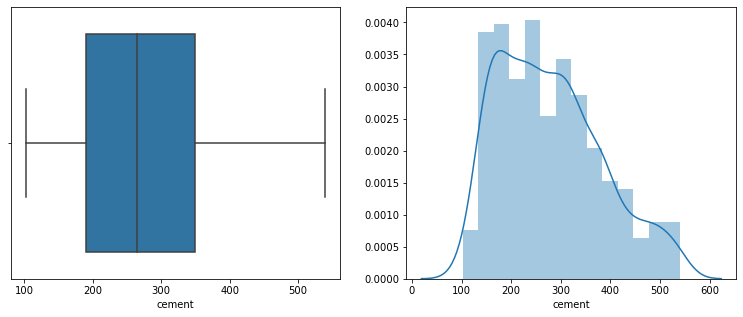

-----------------------------------------------------------

Column Name >> slag
	Data Type       >> float64
	Skewness is     >> 0.8552248976041231
	Minimun is      >> 0.0
	Maximum is      >> 359.4
	Mean is         >> 72.04348258706466
	Median is       >> 20.0
	Std Dev is      >> 86.17080699343262
	Range of Values >> 359.4
	25% quartile is >> 0.0
	50% quartile is >> 20.0
	75% quartile is >> 142.5
	IQR is          >> 142.5
Left Side Outliers >>
 Series([], Name: slag, dtype: float64)
Right Side Outliers>>
 918    359.4
990    359.4
Name: slag, dtype: float64


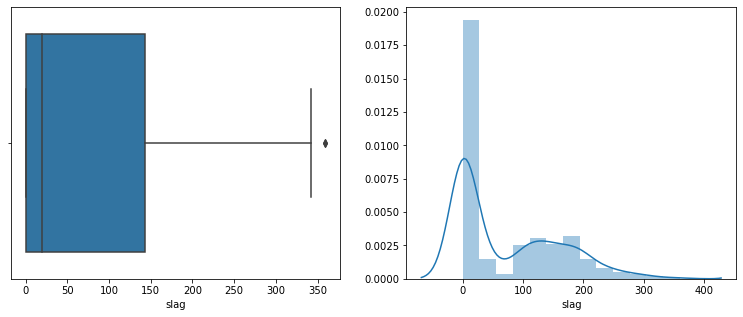

-----------------------------------------------------------

Column Name >> ash
	Data Type       >> float64
	Skewness is     >> 0.4972312662135868
	Minimun is      >> 0.0
	Maximum is      >> 200.1
	Mean is         >> 55.53631840796018
	Median is       >> 0.0
	Std Dev is      >> 64.20796859777033
	Range of Values >> 200.1
	25% quartile is >> 0.0
	50% quartile is >> 0.0
	75% quartile is >> 118.3
	IQR is          >> 118.3
Left Side Outliers >>
 Series([], Name: ash, dtype: float64)
Right Side Outliers>>
 Series([], Name: ash, dtype: float64)


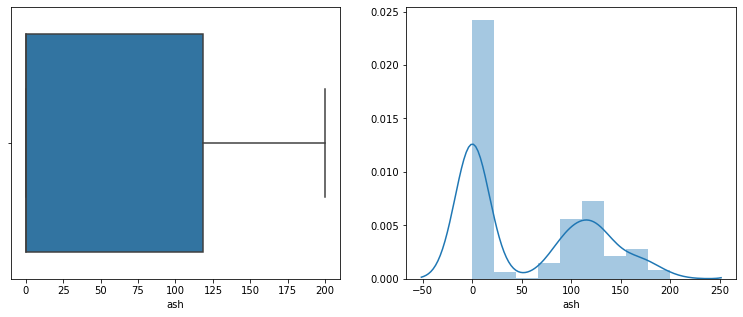

-----------------------------------------------------------

Column Name >> water
	Data Type       >> float64
	Skewness is     >> 0.03443320802163803
	Minimun is      >> 121.8
	Maximum is      >> 247.0
	Mean is         >> 182.07532338308457
	Median is       >> 185.7
	Std Dev is      >> 21.339334087611324
	Range of Values >> 125.2
	25% quartile is >> 166.6
	50% quartile is >> 185.7
	75% quartile is >> 192.9
	IQR is          >> 26.30000000000001
Left Side Outliers >>
 33     127.0
129    126.6
432    121.8
447    126.6
462    121.8
504    126.6
584    126.6
587    121.8
789    121.8
857    126.6
914    121.8
Name: water, dtype: float64
Right Side Outliers>>
 66     247.0
263    246.9
740    237.0
826    236.7
Name: water, dtype: float64


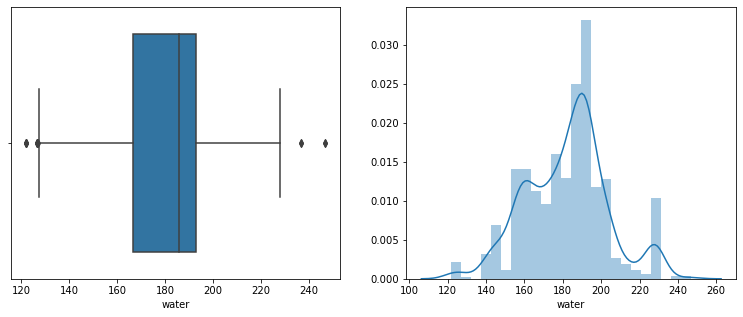

-----------------------------------------------------------

Column Name >> superplastic
	Data Type       >> float64
	Skewness is     >> 0.9806043204539714
	Minimun is      >> 0.0
	Maximum is      >> 32.2
	Mean is         >> 6.033233830845768
	Median is       >> 6.1
	Std Dev is      >> 5.9199667200234325
	Range of Values >> 32.2
	25% quartile is >> 0.0
	50% quartile is >> 6.1
	75% quartile is >> 10.0
	IQR is          >> 10.0
Left Side Outliers >>
 Series([], Name: superplastic, dtype: float64)
Right Side Outliers>>
 44      28.2
156     28.2
232     32.2
292     32.2
538     28.2
744     32.2
816     32.2
838     28.2
955     32.2
1026    28.2
Name: superplastic, dtype: float64


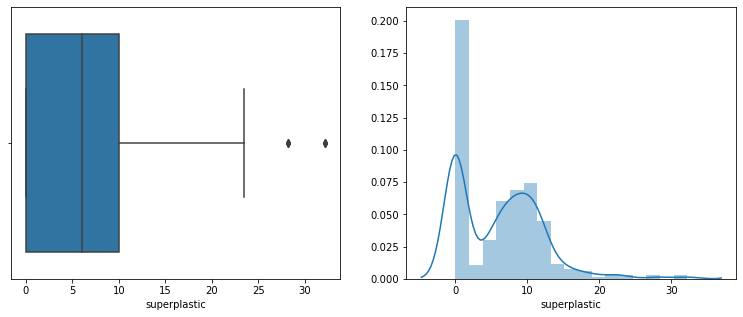

-----------------------------------------------------------

Column Name >> coarseagg
	Data Type       >> float64
	Skewness is     >> -0.06525599883507706
	Minimun is      >> 801.0
	Maximum is      >> 1145.0
	Mean is         >> 974.3768159203987
	Median is       >> 968.0
	Std Dev is      >> 77.57966673714671
	Range of Values >> 344.0
	25% quartile is >> 932.0
	50% quartile is >> 968.0
	75% quartile is >> 1031.0
	IQR is          >> 99.0
Left Side Outliers >>
 Series([], Name: coarseagg, dtype: float64)
Right Side Outliers>>
 Series([], Name: coarseagg, dtype: float64)


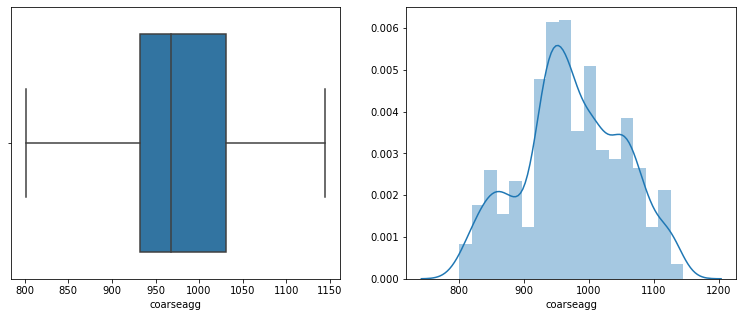

-----------------------------------------------------------

Column Name >> fineagg
	Data Type       >> float64
	Skewness is     >> -0.2523531808980051
	Minimun is      >> 594.0
	Maximum is      >> 992.6
	Mean is         >> 772.6882587064675
	Median is       >> 780.0
	Std Dev is      >> 80.34043464964547
	Range of Values >> 398.6
	25% quartile is >> 724.3
	50% quartile is >> 780.0
	75% quartile is >> 822.2
	IQR is          >> 97.90000000000009
Left Side Outliers >>
 Series([], Name: fineagg, dtype: float64)
Right Side Outliers>>
 129    992.6
447    992.6
504    992.6
584    992.6
857    992.6
Name: fineagg, dtype: float64


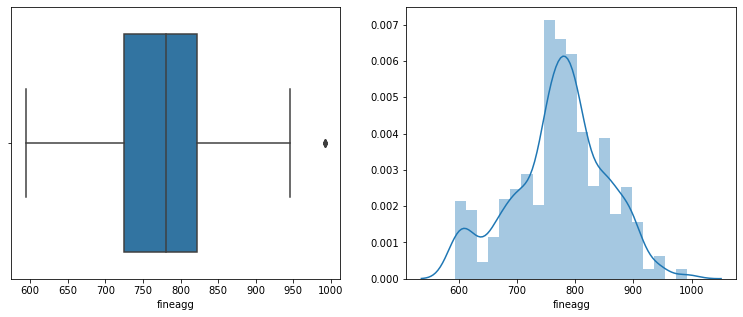

-----------------------------------------------------------

Column Name >> age
	Data Type       >> int64
	Skewness is     >> 3.253973717331205
	Minimun is      >> 1
	Maximum is      >> 365
	Mean is         >> 45.85671641791045
	Median is       >> 28.0
	Std Dev is      >> 63.734691679416535
	Range of Values >> 364
	25% quartile is >> 7.0
	50% quartile is >> 28.0
	75% quartile is >> 56.0
	IQR is          >> 49.0
Left Side Outliers >>
 Series([], Name: age, dtype: int64)
Right Side Outliers>>
 51      180
64      365
93      180
99      180
103     180
133     365
144     180
149     270
152     180
157     360
159     365
198     365
199     180
207     180
256     270
262     270
270     270
297     270
302     180
312     180
313     270
323     360
359     180
361     360
370     180
393     365
448     360
465     365
484     365
539     180
570     270
581     180
594     180
601     365
620     180
622     180
623     270
632     270
642     180
696     180
713     365
720     365

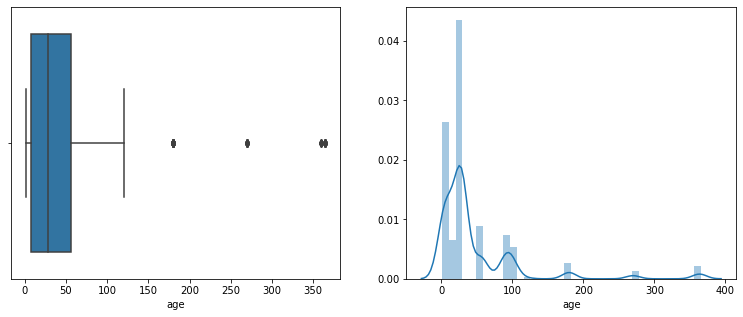

-----------------------------------------------------------

Column Name >> strength
	Data Type       >> float64
	Skewness is     >> 0.39569613431539385
	Minimun is      >> 2.33
	Maximum is      >> 82.6
	Mean is         >> 35.25037810945276
	Median is       >> 33.8
	Std Dev is      >> 16.284815369229044
	Range of Values >> 80.27
	25% quartile is >> 23.52
	50% quartile is >> 33.8
	75% quartile is >> 44.87
	IQR is          >> 21.349999999999998
Left Side Outliers >>
 Series([], Name: strength, dtype: float64)
Right Side Outliers>>
 190     77.30
192     81.75
245     79.30
257     79.40
506     78.80
732     79.99
950     82.60
1003    80.20
Name: strength, dtype: float64


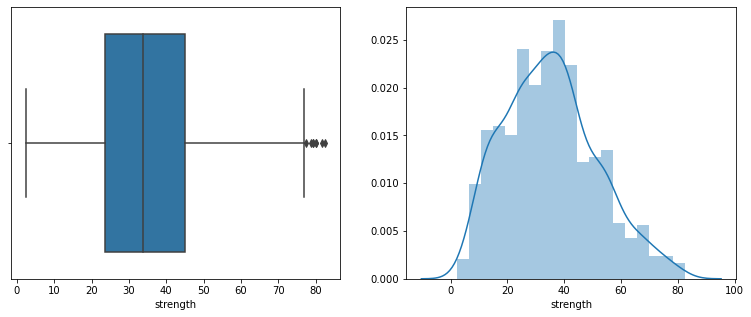

-----------------------------------------------------------



In [10]:
# Name, Range of Values, Mean, Median, Std Dev and Quartiles, Outliers, Box & Dist Plots
for i in con_df.columns:
    fig, (ax1,ax2)=plt.subplots(1,2,figsize=(13,5))
    print('Column Name >>',i)
    print('\tData Type       >>', con_df[i].dtype)
    print('\tSkewness is     >>', con_df[i].skew())
    print('\tMinimun is      >>',con_df[i].min())
    print('\tMaximum is      >>',con_df[i].max())
    print('\tMean is         >>',con_df[i].mean())
    print('\tMedian is       >>',con_df[i].median())
    print('\tStd Dev is      >>',con_df[i].std())
    print('\tRange of Values >>',con_df[i].max()-con_df[i].min())
    Q1=con_df[i].quantile(q=.25)
    Q3=con_df[i].quantile(q=.75)
    IQR=Q3-Q1
    print('\t25% quartile is >>',Q1)
    print('\t50% quartile is >>',con_df[i].quantile(q=.5))
    print('\t75% quartile is >>',Q3)
    print('\tIQR is          >>',IQR)
    Box_size=1.5*(IQR)
    print("Left Side Outliers >>\n",con_df[i][con_df[i] <(Q1-Box_size)])
    print("Right Side Outliers>>\n",con_df[i][con_df[i] >(Q3+Box_size)])
    sns.boxplot(x=con_df[i],ax=ax1)
    sns.distplot(con_df[i],ax=ax2)
    plt.show()
    print("-----------------------------------------------------------\n")

### Observation:
1. Cement has no outliers and is positively skewed with distribution ranging from 102 to 540
2. slag has 2 outliers on the positive side with distribution ranging from 0 to 359.4
3. ash has no outliers and has 2 gaussians with distribution ranging from 0 to 200.1
4. water has 3 guassians and has outliers on both sides with distribution ranging from 121.8 to 247
5. superplastic has 2 guassians with outliers on positive side, distribution is ranging from 0 to 32.2
6. coarseagg has no outliers and distribution is ranging from 801 to 1145
7. fineagg has outliers on the positive side with distribution ranging from 594 to 992.6
8. age has multiple guassians and has outliers on the positive side with distribution ranging from 1 to 365.
9. Strength has few outliers on the positive side with distribution ranging from 2.33 to 82.6

## Bivariate Analysis

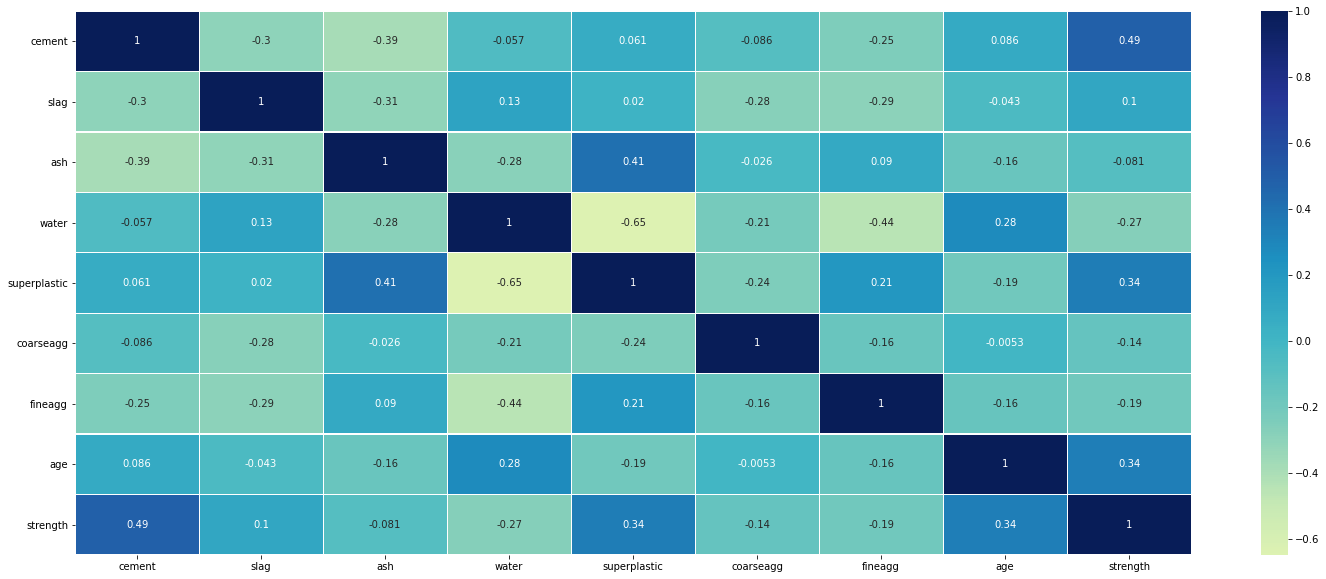

In [11]:
# Getting Correlation
plt.figure(figsize=(25,10))
sns.heatmap(con_df.corr(),annot=True,linewidths=.1,center=0,cmap="YlGnBu")

Observation:
    1. Cement is most positive correlated with Strength and very slightly with superplastic and age, it is slightly negatively correlated with ash,slag and fineagg
    2. slag is negatively correlated with cement, ash, coarseagg and fineagg and very slighly positively correlated with strength and water.
    3. ash has highest negative correlation with cement and then slag and then water and most positive correlation with superplastic.
    4. Water has highest negatively correlation with superplastic and then with fineagg and then with ash & strength. It is slightly postively correlated with age.
    5. Superplastic is higly negatively correlated with water and then with coarseagg and age. It is slightly positively correlated with ash and then with strength 
    6. fineagg and water are also slightly negatively correlated and then with slag and cement
    7. age has good postive correlation with strength and then with water
    8. strength has most positive correlation with cement and then with superplastic and age and somewhat negative correlation with water.

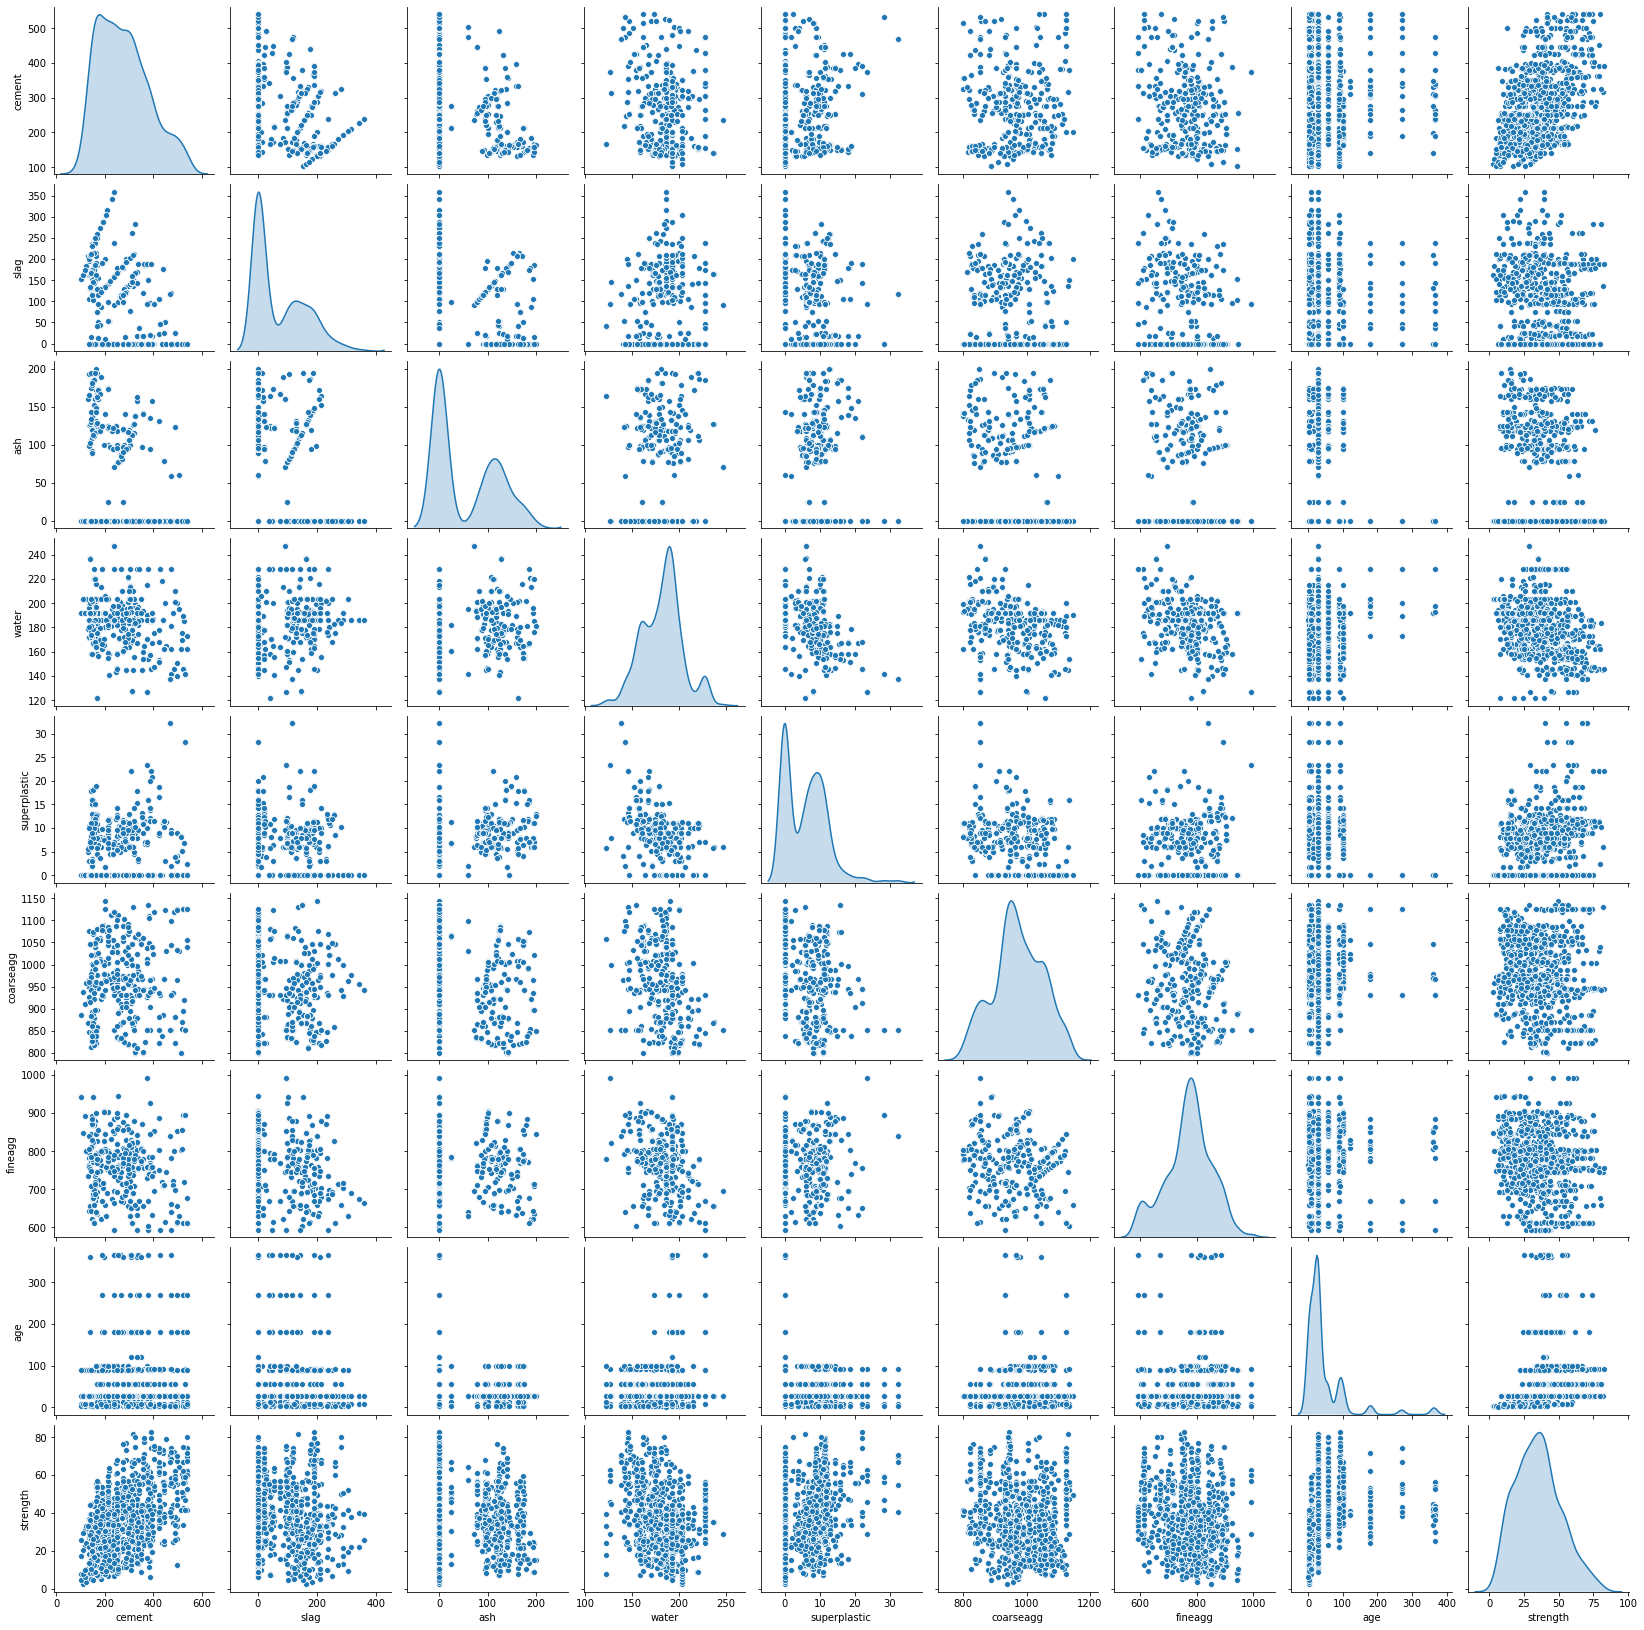

In [12]:
sns.pairplot(con_df,diag_kind='kde')

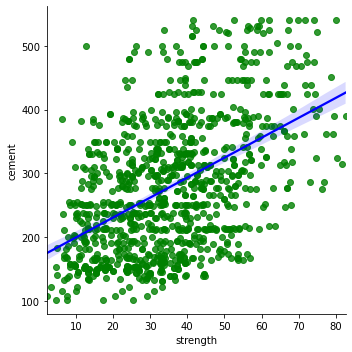

In [13]:
# Cement V/s Strength

sns.lmplot(x='strength',y='cement',data=con_df,scatter_kws={'color': 'green'},line_kws={'color': 'blue'})
#sns.scatterplot(x='strength',y='cement',data=con_df)


Observation:
    Cement has positive linear relationship with strength, Cement has multiple values for a given value of strength, hence being a weak predictor.

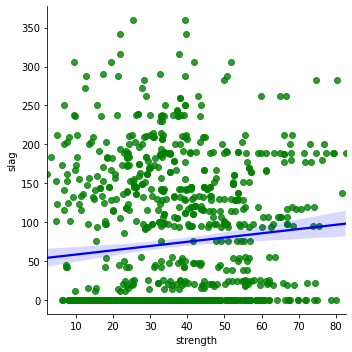

In [14]:
# Slag V/s Strength
sns.lmplot(x='strength',y='slag',data=con_df,scatter_kws={'color': 'green'},line_kws={'color': 'blue'})

Observation:
    Looks like cloud distribution, very little positive linear relationship, very weak predictor

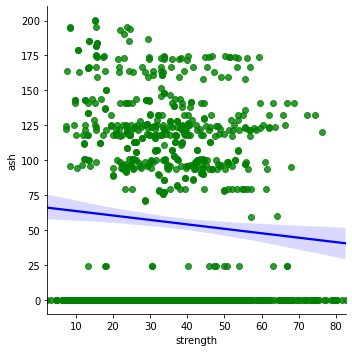

In [15]:
# Ash V/s Strength
sns.lmplot(x='strength',y='ash',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    Looks like cloud distribution, very little negative linear relationship,has cloud distribution, very weak predictor

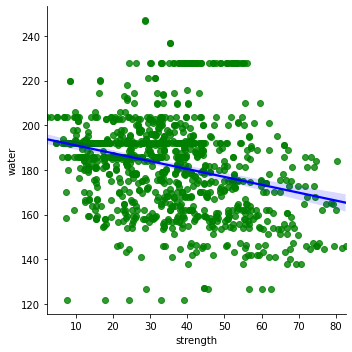

In [16]:
# Water V/s Strength
sns.lmplot(x='strength',y='water',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    Water has little negative linear relationship with strength,has cloud distribution, not a good predictor

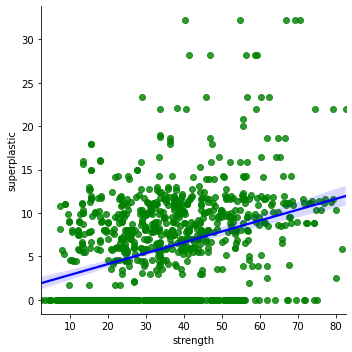

In [17]:
# Superplastic V/s Strength
sns.lmplot(x='strength',y='superplastic',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    Superplastic has little positive linear relationship with strength. Has a cloud distribution,Not a good predictor

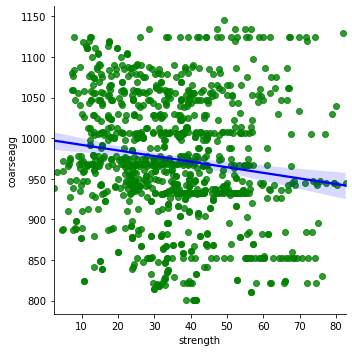

In [18]:
# coarseagg V/S Strgngth
sns.lmplot(x='strength',y='coarseagg',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    coarseagg has little negative linear relationship with strength, has cloud distribution, very weak predictor

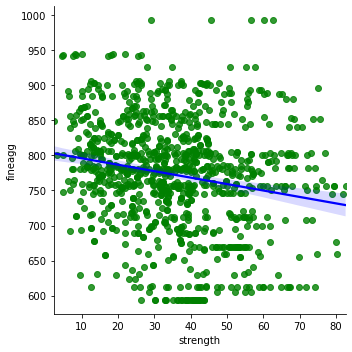

In [19]:
# fineagg V/S Strgngth
sns.lmplot(x='strength',y='fineagg',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    fineagg has little negative linear relationship with strength, has cloud distribution, very weak predictor

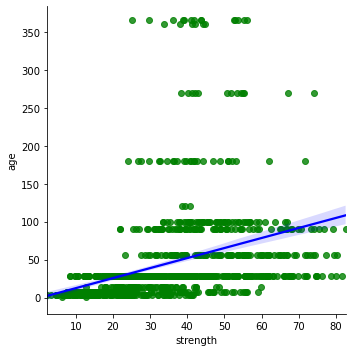

In [20]:
# age V/S Strength
sns.lmplot(x='strength',y='age',data=con_df,scatter_kws={'color':'green'},line_kws={'color':'blue'})

Observation:
    age has little positive linear relationship with strength, is a weak predictor

# Feature Engineering

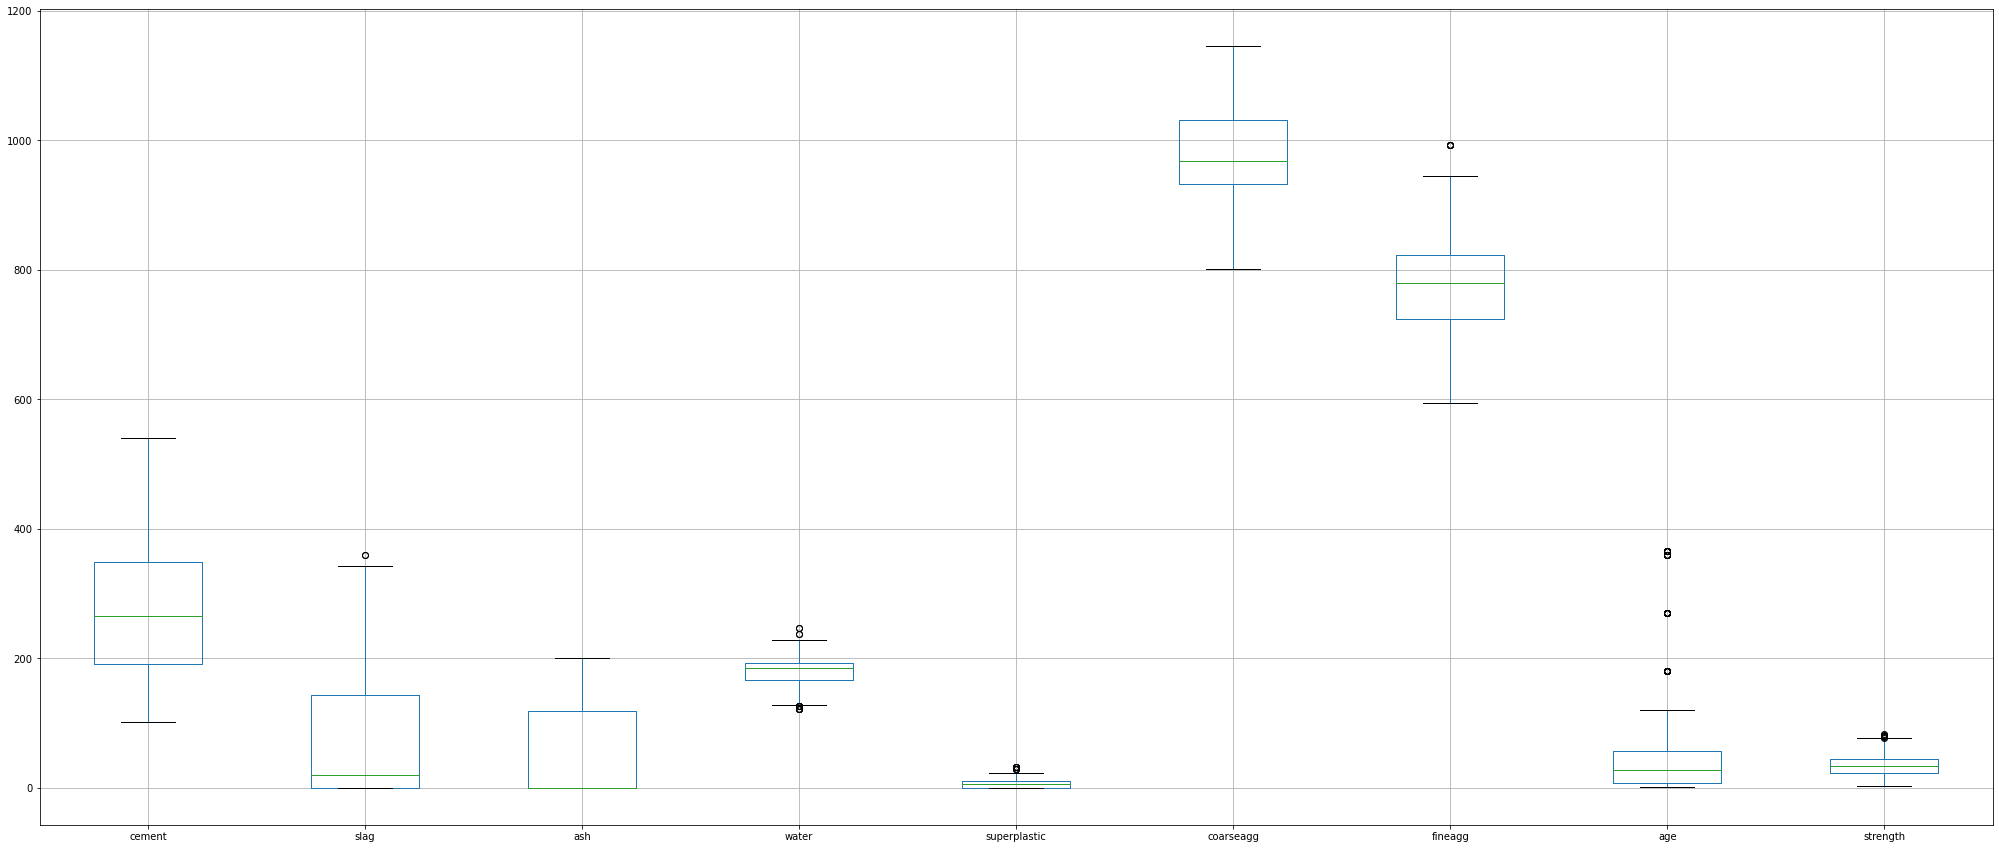

In [21]:
# Outliers Depiction
con_df1=con_df.copy()
con_df1.boxplot(figsize=(35,15))

### Observation:
We have outliers in slag, water,superplastic,fineagg, age and strength

In [22]:
# Capping the outliers, with the upper/lower limits of IQR
for i in con_df1.columns:
    print(i)
    Q1,Q3=con_df1[i].quantile([.25,.75])
    IQR=Q3-Q1
    Box_size=1.5*(IQR)
    print("Box Size--",Box_size)
    print("Lower Limit--",(Q1-Box_size))
    print("Upper Limit--",(Q3+Box_size))
    print("Left Side Outliers Count >>",con_df1[i][con_df1[i] <(Q1-Box_size)].count())
    print("Left Side Outliers >>\n",con_df1[i][con_df1[i] <(Q1-Box_size)])
    con_df1[i][con_df1[i] <(Q1-Box_size)]=(Q1-Box_size)
    print("Right Side Outliers Count >>",con_df1[i][con_df1[i] >(Q3+Box_size)].count())
    print("Right Side Outliers >>\n",con_df1[i][con_df1[i] >(Q3+Box_size)])
    con_df1[i][con_df1[i] >(Q3+Box_size)]=(Q3+Box_size)
    print("--------------------------------------------")

cement
Box Size-- 237.45000000000002
Lower Limit-- -46.75000000000003
Upper Limit-- 586.45
Left Side Outliers Count >> 0
Left Side Outliers >>
 Series([], Name: cement, dtype: float64)
Right Side Outliers Count >> 0
Right Side Outliers >>
 Series([], Name: cement, dtype: float64)
--------------------------------------------
slag
Box Size-- 213.75
Lower Limit-- -213.75
Upper Limit-- 356.25
Left Side Outliers Count >> 0
Left Side Outliers >>
 Series([], Name: slag, dtype: float64)
Right Side Outliers Count >> 2
Right Side Outliers >>
 918    359.4
990    359.4
Name: slag, dtype: float64
--------------------------------------------
ash
Box Size-- 177.45
Lower Limit-- -177.45
Upper Limit-- 295.75
Left Side Outliers Count >> 0
Left Side Outliers >>
 Series([], Name: ash, dtype: float64)
Right Side Outliers Count >> 0
Right Side Outliers >>
 Series([], Name: ash, dtype: float64)
--------------------------------------------
water
Box Size-- 39.45000000000002
Lower Limit-- 127.14999999999998
U

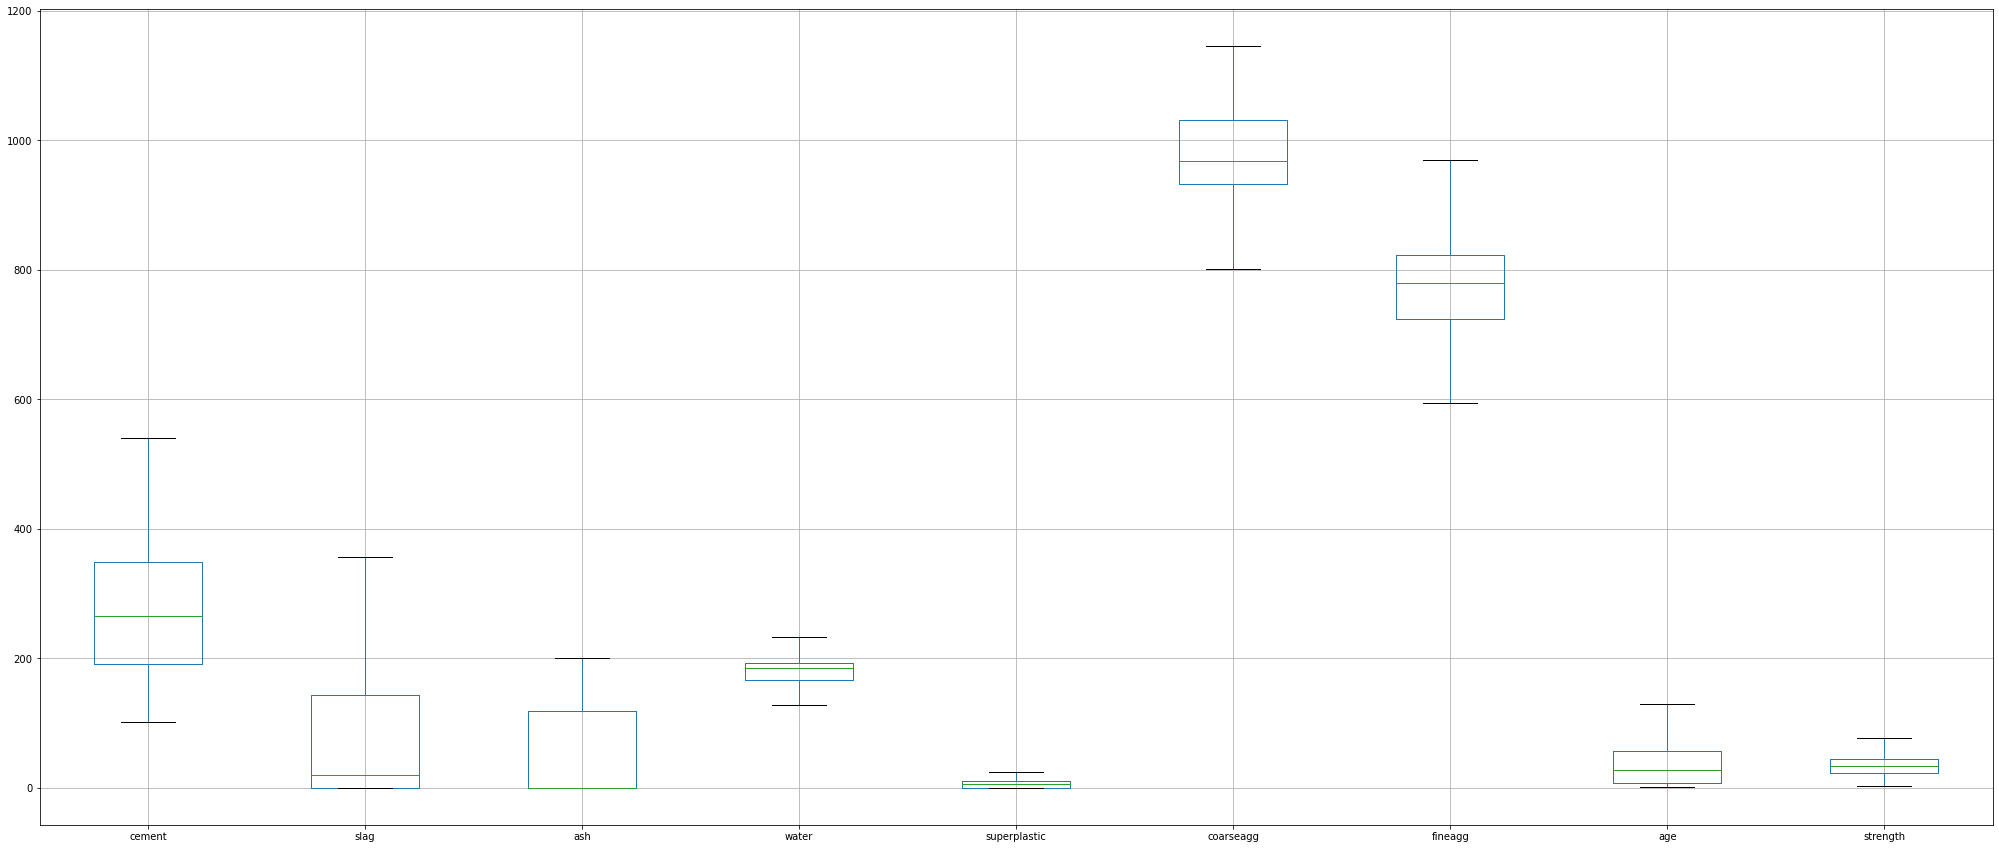

In [23]:
# outliers corrected
con_df1.boxplot(figsize=(35,15))

In [24]:
# Correlation
con_df1.corr()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
cement,1.000000,-0.303370,-0.385610,-0.057209,0.044817,-0.086205,-0.247662,0.055649,0.488690
slag,-0.303370,1.000000,-0.312365,0.130227,0.019602,-0.277595,-0.291129,-0.054634,0.102440
ash,-0.385610,-0.312365,1.000000,-0.284541,0.436185,-0.026468,0.091873,-0.094626,-0.079685
water,-0.057209,0.130227,-0.284541,1.000000,-0.656012,-0.210399,-0.444192,0.194559,-0.271381
superplastic,0.044817,0.019602,0.436185,-0.656012,1.000000,-0.235715,0.201940,-0.127533,0.342983
coarseagg,-0.086205,-0.277595,-0.026468,-0.210399,-0.235715,1.000000,-0.160494,0.012784,-0.145794
fineagg,-0.247662,-0.291129,0.091873,-0.444192,0.201940,-0.160494,1.000000,-0.097933,-0.188509
age,0.055649,-0.054634,-0.094626,0.194559,-0.127533,0.012784,-0.097933,1.000000,0.476726
strength,0.488690,0.102440,-0.079685,-0.271381,0.342983,-0.145794,-0.188509,0.476726,1.000000


In [25]:
# Dropping the columns insignificant/very weak in predicting Target variable
#con_df1.drop(['ash','coarseagg','slag'],inplace=True,axis=1)
# Dropping these columns was reducing the accuracy 

In [26]:
con_df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,25.0,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,129.5,55.06


In [27]:
# Scaling the dataset

std_scale=StandardScaler()
con_df2=pd.DataFrame(std_scale.fit_transform(con_df1),columns=con_df1.columns)

In [28]:
con_df2

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.316792,1.625450,-0.865375,1.013480,-1.045420,-0.033232,-0.300903,-0.281105,-0.329155
1,-1.052152,-0.346513,1.071486,-1.123827,0.842159,1.372475,0.295376,-0.671679,-0.722686
2,-0.274530,-0.836600,0.625836,0.252182,-0.084153,-0.225388,1.107915,-0.281105,-0.370482
3,-0.121115,0.487332,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,-0.281105,0.655290
4,-1.187348,1.293305,-0.865375,0.531167,0.545040,0.941736,-0.948435,-0.281105,-1.044666
...,...,...,...,...,...,...,...,...,...
1000,-1.377199,-0.836600,1.721261,-0.097731,0.702338,-0.172513,0.405381,-0.281105,-1.353076
1001,2.422696,-0.836600,-0.865375,-1.904038,3.323976,-1.576930,1.514185,-0.978558,0.374637
1002,-0.021395,0.510559,0.541693,-0.116645,0.510085,-1.344795,-0.053391,-0.281105,0.558449
1003,0.607606,-0.395289,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,2.550555,1.223381


In [29]:
# Splitting the data
X = con_df2.drop("strength" , axis=1)
y = con_df2.pop("strength")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=7)

In [30]:
# Deciding upon the complexity of the models

kfold_lr = KFold(n_splits=10,shuffle=True,random_state=7)

regression_model = LinearRegression()

results_lr = cross_val_score(regression_model, X_train, y_train, cv=kfold_lr)
print(results_lr)
acc_lr=results_lr.mean()*100.0
std_lr=results_lr.std()*100.0

print("Accuracy: %.3f%% (Std: %.3f%%)" % (acc_lr, std_lr))


[0.74603115 0.73389938 0.6777415  0.67318552 0.71729932 0.68465515
 0.61006647 0.6957841  0.69498343 0.74411182]
Accuracy: 69.778% (Std: 3.879%)


In [31]:
regression_model.fit(X_train, y_train)
y_pred=regression_model.predict(X_test)
print("Training Score",regression_model.score(X_train, y_train))
print("Test Score--",regression_model.score(X_test, y_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("Linear RMSE--",rmse)
print("Shape of Linear X--",X_train.shape)

Training Score 0.7144600884762276
Test Score-- 0.7413284172623876
Linear RMSE-- 0.5046862199937204
Shape of Linear X-- (753, 8)


### Testing for Quadratic features

In [32]:
poly2 = PolynomialFeatures(degree=2, interaction_only=True)
X_train2 = poly2.fit_transform(X_train)
X_test2 = poly2.fit_transform(X_test)
poly2_lr = LinearRegression()



In [33]:
results_lr2 = cross_val_score(poly2_lr, X_train2, y_train, cv=kfold_lr)
print(results_lr2)
acc_lr2=results_lr2.mean()*100.0
std_lr2=results_lr2.std()*100.0

print("Accuracy: %.3f%% (Std: %.3f%%)" % (acc_lr2, std_lr2))

[0.82714578 0.77714358 0.7145513  0.75215034 0.74230013 0.75409257
 0.64634064 0.76515167 0.72971584 0.80894925]
Accuracy: 75.175% (Std: 4.781%)


In [34]:
#print(poly2_lr.score(X_train2, y_train))
poly2_lr.fit(X_train2, y_train)
y_pred2=poly2_lr.predict(X_test2)
print("Training Score",poly2_lr.score(X_train2, y_train))
print("Test Score--",poly2_lr.score(X_test2, y_test))
rmse2=np.sqrt(mean_squared_error(y_test,y_pred2))
print("Quad RMSE--",rmse2)
print("Shape of Quad X_train--",X_train2.shape)

Training Score 0.7914407987445713
Test Score-- 0.773178751125458
Quad RMSE-- 0.47259481805069026
Shape of Quad X_train-- (753, 37)


### Testing for 3rd degree features

In [35]:
poly3 = PolynomialFeatures(degree=3, interaction_only=True)
X_train3 = poly3.fit_transform(X_train)
X_test3 = poly3.fit_transform(X_test)
poly3_lr = LinearRegression()


In [36]:
results_lr3 = cross_val_score(poly3_lr, X_train3, y_train, cv=kfold_lr)
print(results_lr3)
acc_lr3=results_lr3.mean()*100.0
std_lr3=results_lr3.std()*100.0

print("Accuracy: %.3f%% (Std: %.3f%%)" % (acc_lr3, std_lr3))

[0.82776695 0.6953776  0.65726542 0.6773128  0.73911415 0.75675744
 0.61031653 0.74990685 0.72285943 0.81909509]
Accuracy: 72.558% (Std: 6.491%)


In [37]:
#print(poly3_lr.score(X_train3, y_train))
poly3_lr.fit(X_train3, y_train)
y_pred3=poly3_lr.predict(X_test3)
print("Training Score",poly3_lr.score(X_train3, y_train))
print("Test Score--",poly3_lr.score(X_test3, y_test))
rmse3=np.sqrt(mean_squared_error(y_test,y_pred3))
r23=r2_score(y_test,y_pred3)
print("RMSE3--",rmse3)
print("r23--",r23)
print("Shape of 3degree X_train--",X_train3.shape)

Training Score 0.8296911674801193
Test Score-- 0.8044910508945338
RMSE3-- 0.43876341427437693
r23-- 0.8044910508945338
Shape of 3degree X_train-- (753, 93)


### Observation:
    As we can see from the Corr table that none of the independent variables are strong predictors of the target variable, Linear model is best suited in comparision to quadratic and higher degree and is also not overfitting. 
    The score has improved to 3% in quadratic and 6% in 3rd degree but also has increased complexity by increasing Column count to more than 4 fold in quadratic and more than 11 fold in 3rd degree.
    Hence the Model should be simple Linear model.

## Creating the Model and Tuning It

### Decision Tree Regressor

In [38]:
kfold = KFold(n_splits=10,shuffle=True,random_state=7)

In [39]:
dtr_model = DecisionTreeRegressor()

results = cross_val_score(dtr_model, X_train, y_train, cv=kfold)
print(results)
acc_dtr=results.mean()*100.0
std_dtr=results.std()*100.0

print("Accuracy: %.3f%% (Std: %.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.87735219 0.75630345 0.81174348 0.85212705 0.78558784 0.8125742
 0.7465786  0.76387711 0.63943598 0.91006948]
Accuracy: 79.556% (Std: 7.278%)


In [40]:
#Store the DecisionTreeRegressor results in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['DecisionTreeRegressor(KFold)'], 'Accuracy': acc_dtr,
                         'Std Dev':std_dtr})
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174


### Random Forest Regressor

In [41]:
rfr_model=RandomForestRegressor()
results_rfr = cross_val_score(rfr_model, X_train, y_train, cv=kfold)
print(results_rfr)
acc_rfr=results_rfr.mean()*100.0
std_rfr=results_rfr.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_rfr.mean()*100.0, results_rfr.std()*100.0))


[0.92129949 0.86312163 0.86425463 0.91385037 0.88773192 0.88338905
 0.84596899 0.88528127 0.83040845 0.90989444]
Accuracy: 88.052% (Std: 2.827%)


In [42]:
#rfr_model.get_params()

In [43]:
resultsDf.loc[1]=["RandomForestRegressor(KFold)",acc_rfr,std_rfr]
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174
1,RandomForestRegressor(KFold),88.052002,2.826987


### Gradient Boosting Regressor

In [44]:
gbr_model=GradientBoostingRegressor()
results_gbr = cross_val_score(gbr_model, X_train, y_train, cv=kfold)
print(results_gbr)
acc_gbr=results_gbr.mean()*100.0
std_gbr=results_gbr.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_gbr.mean()*100.0, results_gbr.std()*100.0))

[0.90111433 0.86117693 0.8774679  0.91194698 0.87533621 0.88709233
 0.86701231 0.90918857 0.8630086  0.90779725]
Accuracy: 88.611% (Std: 1.899%)


In [45]:
resultsDf.loc[2]=["GradientBoostingRegressor(KFold)",acc_gbr,std_gbr]
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174
1,RandomForestRegressor(KFold),88.052002,2.826987
2,GradientBoostingRegressor(KFold),88.611414,1.899320


### Ada Boost Regressor

In [46]:
ada_model=AdaBoostRegressor()
results_ada = cross_val_score(ada_model, X_train, y_train, cv=kfold)
print(results_ada)
acc_ada=results_ada.mean()*100.0
std_ada=results_ada.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_ada.mean()*100.0, results_ada.std()*100.0))

[0.78055332 0.76973539 0.73246243 0.7853839  0.74964589 0.79537438
 0.65242347 0.77227254 0.64910617 0.79199168]
Accuracy: 74.789% (Std: 5.182%)


In [47]:
resultsDf.loc[3]=["AdaBoostRegressor(KFold)",acc_ada,std_ada]
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174
1,RandomForestRegressor(KFold),88.052002,2.826987
2,GradientBoostingRegressor(KFold),88.611414,1.899320
3,AdaBoostRegressor(KFold),74.789492,5.182406


### Bagging Regressor

In [48]:
bgr_model=BaggingRegressor()
results_bgr = cross_val_score(bgr_model, X_train, y_train, cv=kfold)
print(results_bgr)
acc_bgr=results_bgr.mean()*100.0
std_bgr=results_bgr.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_bgr.mean()*100.0, results_bgr.std()*100.0))

[0.89154751 0.85162999 0.86012949 0.90619592 0.84297067 0.86713085
 0.85528719 0.84346934 0.82369623 0.89708685]
Accuracy: 86.391% (Std: 2.525%)


In [49]:
resultsDf.loc[4]=["BaggingRegressor(KFold)",acc_bgr,std_bgr]
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174
1,RandomForestRegressor(KFold),88.052002,2.826987
2,GradientBoostingRegressor(KFold),88.611414,1.899320
3,AdaBoostRegressor(KFold),74.789492,5.182406
4,BaggingRegressor(KFold),86.391440,2.525050


### Observation:
Gradient Boosting has the best KFold Accuracy of 88.611% with Std Dev of 1.899 
For 95% confidence: Range is from 84.81% to 92.41%

### Tuning Hyper Parameters  using RandomizedSearchCV

In [50]:
# HP tuning for RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 50)] #num = 10
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
max_depth.append(None)

# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
min_samples_leaf = [1, 2, 5, 10]
# Method of selecting samples for training each tree
#bootstrap = [True, False]

param_grid ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    #'bootstrap': bootstrap
            }

In [51]:
# Fitting the RandomSearchCV over the Parameter Grid to get Best Model
rdf_model=RandomForestRegressor()
randomCV = RandomizedSearchCV(rdf_model, param_distributions=param_grid, n_iter=50,n_jobs=-1)
randomCV.fit(X_train, y_train)
print(randomCV.best_params_)

{'n_estimators': 991, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}


In [52]:
# Printing the Mean Test Scores
randomCV.cv_results_['mean_test_score']

array([0.78441517, 0.80038926, 0.85271105, 0.74392674, 0.87726316,
       0.84481724, 0.70691724, 0.87294985, 0.83604721, 0.84357804,
       0.80035539, 0.74356529, 0.79929237, 0.80294251, 0.74274797,
       0.63165216, 0.81303281, 0.58196317, 0.8272683 , 0.57212135,
       0.84759002, 0.80473937, 0.74213832, 0.86969323, 0.80189499,
       0.86177006, 0.63042202, 0.80084895, 0.81055472, 0.62969292,
       0.80103365, 0.57984277, 0.80878091, 0.80230366, 0.62843739,
       0.86706758, 0.87725633, 0.86840879, 0.84651818, 0.84397676,
       0.6301282 , 0.80096033, 0.80862755, 0.80435095, 0.62621055,
       0.78384796, 0.87104282, 0.70372284, 0.62982383, 0.62972684])

In [53]:
# Getting the Best Model suggested
best_model=randomCV.best_estimator_
best_model

RandomForestRegressor(n_estimators=991)

In [54]:
mean_test_scores=randomCV.cv_results_['mean_test_score']
mean_test_scores.sort()
print(mean_test_scores)

[0.57212135 0.57984277 0.58196317 0.62621055 0.62843739 0.62969292
 0.62972684 0.62982383 0.6301282  0.63042202 0.63165216 0.70372284
 0.70691724 0.74213832 0.74274797 0.74356529 0.74392674 0.78384796
 0.78441517 0.79929237 0.80035539 0.80038926 0.80084895 0.80096033
 0.80103365 0.80189499 0.80230366 0.80294251 0.80435095 0.80473937
 0.80862755 0.80878091 0.81055472 0.81303281 0.8272683  0.83604721
 0.84357804 0.84397676 0.84481724 0.84651818 0.84759002 0.85271105
 0.86177006 0.86706758 0.86840879 0.86969323 0.87104282 0.87294985
 0.87725633 0.87726316]


In [55]:
# Using the best model to get the KFold Cross Val Score Accuracy & Std Deviation

results_rfr_RV = cross_val_score(best_model, X_test, y_test, cv=kfold)
print(results_rfr_RV)
acc_rfrRV=results_rfr_RV.mean()*100.0
std_rfrRV=results_rfr_RV.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_rfr_RV.mean()*100.0, results_rfr_RV.std()*100.0))

[0.8645918  0.84597281 0.86154457 0.8408564  0.89479838 0.77004698
 0.81997353 0.70264028 0.83030011 0.81032841]
Accuracy: 82.411% (Std: 5.169%)


In [56]:
#Store the HP Tuned results in a dataframe for final comparison
resultsDf.loc[5]=["RandomForestRegressor(KFold)Tuned",acc_rfrRV,std_rfrRV]
HPTune_Df = pd.DataFrame({'Method':['RandomForestRegressor(KFold)Tuned'], 'Accuracy': acc_rfrRV,
                         'Std Dev': std_rfrRV})
HPTune_Df

,Method,Accuracy,Std Dev
0,RandomForestRegressor(KFold)Tuned,82.410533,5.16899


### Hyper Parameter tuning for BaggingRegressor

In [57]:
# HP tuning for BaggingRegressor
bgr_model1=BaggingRegressor()

In [58]:
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 120, num = 12)]
max_features = [3,4,5,6]
bootstrap = [True, False]
bootstrap_features = [True, False]

param_grid1 ={
    'n_estimators': n_estimators,
    'max_features': max_features,
    'bootstrap': bootstrap,
    'bootstrap_features':bootstrap_features
            }

In [59]:
# Fitting the RandomSearchCV over the Parameter Grid to get Best Model
randomCV_bgr = RandomizedSearchCV(bgr_model1, param_distributions=param_grid1, n_iter=50,n_jobs=-1)
randomCV_bgr.fit(X_train2, y_train)
print(randomCV_bgr.best_params_)

{'n_estimators': 70, 'max_features': 6, 'bootstrap_features': False, 'bootstrap': False}


In [60]:
# Printing the Mean Test Scores
randomCV_bgr.cv_results_['mean_test_score']

array([0.71707327, 0.6211514 , 0.6544698 , 0.67724997, 0.71631535,
       0.72810032, 0.72493482, 0.64723068, 0.5400862 , 0.63287276,
       0.64553792, 0.78461033, 0.55634424, 0.71394817, 0.64374944,
       0.69593705, 0.64333808, 0.58597882, 0.619097  , 0.76405876,
       0.70755009, 0.70571636, 0.60163663, 0.77408316, 0.73944113,
       0.73115294, 0.58435949, 0.59351874, 0.72886572, 0.62637002,
       0.63879341, 0.63170887, 0.70018022, 0.58380271, 0.65123639,
       0.56533376, 0.55775094, 0.71206451, 0.6865474 , 0.62576493,
       0.68022715, 0.65867011, 0.68539228, 0.57772122, 0.7441502 ,
       0.64882351, 0.64512586, 0.61852305, 0.58104756, 0.58925713])

In [61]:
# Getting the best model from Random search CV
best_model_bgr=randomCV_bgr.best_estimator_
best_model_bgr

BaggingRegressor(bootstrap=False, max_features=6, n_estimators=70)

In [62]:
# Using the best model to get the KFold Cross Val Score Accuracy & Std Deviation
results_best_bgr = cross_val_score(best_model_bgr, X_test, y_test, cv=kfold)
print(results_best_bgr)
acc_best_bgr=results_best_bgr.mean()*100.0
std_best_bgr=results_best_bgr.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_best_bgr.mean()*100.0, results_best_bgr.std()*100.0))

[0.84668047 0.81398071 0.821674   0.81340275 0.87097238 0.69322058
 0.74161602 0.63375267 0.74934461 0.77577471]
Accuracy: 77.604% (Std: 6.923%)


In [63]:
resultsDf.loc[6]=["BaggingRegressor(KFold)Tuned",acc_best_bgr,std_best_bgr]
HPTune_Df.loc[1]=["BaggingRegressor(KFold)Tuned",acc_best_bgr,std_best_bgr]
HPTune_Df

,Method,Accuracy,Std Dev
0,RandomForestRegressor(KFold)Tuned,82.410533,5.168990
1,BaggingRegressor(KFold)Tuned,77.604189,6.922617


### Hyper Parameter tuning for GradientBoostingRegressor

In [64]:
gbr_model1=GradientBoostingRegressor()

In [65]:
param_grid_gbr = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }

In [66]:
# Fitting the RandomSearchCV over the Parameter Grid to get Best Model
randomCV_gbr = RandomizedSearchCV(gbr_model1, param_distributions=param_grid_gbr, n_iter=50,n_jobs=-1)
randomCV_gbr.fit(X_train2, y_train)
print(randomCV_gbr.best_params_)

{'learning_rate': 0.10655190979243123, 'max_depth': 4, 'n_estimators': 243, 'subsample': 0.5141206717475085}


In [67]:
# Printing the Mean Test Scores
randomCV_gbr.cv_results_['mean_test_score']

array([ 8.67658534e-01, -4.25120790e+00, -1.76401527e-01,  8.68599900e-01,
        8.54388775e-01,  8.16242740e-01,  8.66151790e-01,  6.81898885e-01,
        7.93829032e-01,  8.97249358e-01,  4.48330473e-01,  8.30412781e-01,
       -7.41655864e+06, -5.52274745e+23,  7.79011127e-01, -9.41639074e+04,
        7.99505262e-01, -1.51362486e+14,  8.42120879e-01,  8.46767707e-01,
        8.69091405e-01, -8.17452795e-01,  4.75489073e-01,  8.73642959e-01,
        7.38206296e-01,  6.99242153e-01,  2.81097614e-01, -1.74525925e+13,
        5.60273810e-01,  6.53405990e-01, -1.11228356e+44, -1.73031109e+16,
       -2.44843241e-01,  7.33034156e-01,  8.54161217e-01,  3.67740378e-01,
        5.37395586e-01,  8.05933223e-01,  8.54377777e-01,  8.60537562e-01,
        8.62397765e-01,  6.04081556e-01,  8.87362059e-01, -1.39224987e+40,
        8.90750866e-01,  6.56242585e-02,  8.65383737e-01,  6.63135911e-01,
        7.83537882e-01,  7.04056233e-01])

In [68]:
# Getting the best model from Random search CV
best_model_gbr=randomCV_gbr.best_estimator_
best_model_gbr

GradientBoostingRegressor(learning_rate=0.10655190979243123, max_depth=4,
                          n_estimators=243, subsample=0.5141206717475085)

In [69]:
# Using the best model to get the KFold Cross Val Score Accuracy & Std Deviation
results_best_gbr = cross_val_score(best_model_gbr, X_test, y_test, cv=kfold)
print(results_best_gbr)
acc_best_gbr=results_best_gbr.mean()*100.0
std_best_gbr=results_best_gbr.std()*100.0
print("Accuracy: %.3f%% (Std: %.3f%%)" % (results_best_gbr.mean()*100.0, results_best_gbr.std()*100.0))

[0.95873706 0.93998961 0.91683067 0.92526282 0.8946527  0.8807415
 0.92885958 0.7725089  0.93064384 0.80045618]
Accuracy: 89.487% (Std: 5.835%)


In [70]:
resultsDf.loc[7]=["GradientBoostingRegressor(KFold)Tuned",acc_best_gbr,std_best_gbr]
HPTune_Df.loc[2]=["GradientBoostingRegressor(KFold)Tuned",acc_best_gbr,std_best_gbr]
HPTune_Df

,Method,Accuracy,Std Dev
0,RandomForestRegressor(KFold)Tuned,82.410533,5.168990
1,BaggingRegressor(KFold)Tuned,77.604189,6.922617
2,GradientBoostingRegressor(KFold)Tuned,89.486829,5.834527


In [71]:
resultsDf

,Method,Accuracy,Std Dev
0,DecisionTreeRegressor(KFold),79.556494,7.278174
1,RandomForestRegressor(KFold),88.052002,2.826987
2,GradientBoostingRegressor(KFold),88.611414,1.899320
3,AdaBoostRegressor(KFold),74.789492,5.182406
4,BaggingRegressor(KFold),86.391440,2.525050
5,RandomForestRegressor(KFold)Tuned,82.410533,5.168990
6,BaggingRegressor(KFold)Tuned,77.604189,6.922617
7,GradientBoostingRegressor(KFold)Tuned,89.486829,5.834527


### Observation:
After Hyper Parameeter Tuning, GradientBoostingRegressor remains the best algorithm, in terms of Accuracy at 89.487% and Std Dev at 5.83 on Test Data.

For 95% confidence: Ranging from (77.827% to 100%). 